## Import dataset and Libraries

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("C:\\Users\\Aishwarya\\Desktop\\uber data\\uber-raw-data-janjune-15.csv")

In [7]:
df.head(5)

,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID
0,B02617,2015-05-17 09:47:00,B02617,141
1,B02617,2015-05-17 09:47:00,B02617,65
2,B02617,2015-05-17 09:47:00,B02617,100
3,B02617,2015-05-17 09:47:00,B02774,80
4,B02617,2015-05-17 09:47:00,B02617,90


In [10]:
df = df.rename(columns={'Pickup_date': 'Date_time'}) 
df['Date_time'] = pd.to_datetime(df['Date_time']) 

In [11]:
df.head(5) 

,Dispatching_base_num,Date_time,Affiliated_base_num,locationID
0,B02617,2015-05-17 09:47:00,B02617,141
1,B02617,2015-05-17 09:47:00,B02617,65
2,B02617,2015-05-17 09:47:00,B02617,100
3,B02617,2015-05-17 09:47:00,B02774,80
4,B02617,2015-05-17 09:47:00,B02617,90


## Feature engineering

In [14]:
# Adding useful columns
df['Month'] = df['Date_time'].dt.month_name()
df['Weekday'] = df['Date_time'].dt.day_name() 
df['Day'] = df['Date_time'].dt.day
df['Hour'] = df['Date_time'].dt.hour
df['Minute'] = df['Date_time'].dt.minute

In [15]:
df.head()

,Dispatching_base_num,Date_time,Affiliated_base_num,locationID,Month,Weekday,Day,Hour,Minute
0,B02617,2015-05-17 09:47:00,B02617,141,May,Sunday,17,9,47
1,B02617,2015-05-17 09:47:00,B02617,65,May,Sunday,17,9,47
2,B02617,2015-05-17 09:47:00,B02617,100,May,Sunday,17,9,47
3,B02617,2015-05-17 09:47:00,B02774,80,May,Sunday,17,9,47
4,B02617,2015-05-17 09:47:00,B02617,90,May,Sunday,17,9,47


## Exploring dataset

In [29]:
df.head()

,Dispatching_base_num,Date_time,Affiliated_base_num,locationID,Month,Weekday,Day,Hour,Minute
0,B02617,2015-05-17 09:47:00,B02617,141,May,Sunday,17,9,47
1,B02617,2015-05-17 09:47:00,B02617,65,May,Sunday,17,9,47
2,B02617,2015-05-17 09:47:00,B02617,100,May,Sunday,17,9,47
3,B02617,2015-05-17 09:47:00,B02774,80,May,Sunday,17,9,47
4,B02617,2015-05-17 09:47:00,B02617,90,May,Sunday,17,9,47


In [31]:
df.tail()

,Dispatching_base_num,Date_time,Affiliated_base_num,locationID,Month,Weekday,Day,Hour,Minute
14270474,B02765,2015-05-08 15:43:00,B02765,186,May,Friday,8,15,43
14270475,B02765,2015-05-08 15:43:00,B02765,263,May,Friday,8,15,43
14270476,B02765,2015-05-08 15:43:00,B02765,90,May,Friday,8,15,43
14270477,B02765,2015-05-08 15:44:00,B01899,45,May,Friday,8,15,44
14270478,B02765,2015-05-08 15:44:00,B02682,144,May,Friday,8,15,44


In [33]:
df.columns

Index(['Dispatching_base_num', 'Date_time', 'Affiliated_base_num',
       'locationID', 'Month', 'Weekday', 'Day', 'Hour', 'Minute'],
      dtype='object')

In [35]:
df.shape

(14270479, 9)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14270479 entries, 0 to 14270478
Data columns (total 9 columns):
 #   Column                Dtype         
---  ------                -----         
 0   Dispatching_base_num  object        
 1   Date_time             datetime64[ns]
 2   Affiliated_base_num   object        
 3   locationID            int64         
 4   Month                 object        
 5   Weekday               object        
 6   Day                   int32         
 7   Hour                  int32         
 8   Minute                int32         
dtypes: datetime64[ns](1), int32(3), int64(1), object(4)
memory usage: 816.6+ MB


In [40]:
df.describe(include='all')

,Dispatching_base_num,Date_time,Affiliated_base_num,locationID,Month,Weekday,Day,Hour,Minute
count,14270479,14270479,14108284,1.427048e+07,14270479,14270479,1.427048e+07,1.427048e+07,1.427048e+07
unique,8,NaN,284,NaN,6,7,NaN,NaN,NaN
top,B02764,NaN,B02764,NaN,June,Saturday,NaN,NaN,NaN
freq,5753653,NaN,4352321,NaN,2816895,2414563,NaN,NaN,NaN
mean,NaN,2015-04-07 15:04:13.657453056,NaN,1.520574e+02,NaN,NaN,1.590227e+01,1.409316e+01,2.940928e+01
min,NaN,2015-01-01 00:00:05,NaN,1.000000e+00,NaN,NaN,1.000000e+00,0.000000e+00,0.000000e+00
25%,NaN,2015-02-21 03:00:16.500000,NaN,9.200000e+01,NaN,NaN,8.000000e+00,9.000000e+00,1.400000e+01
50%,NaN,2015-04-10 16:21:00,NaN,1.570000e+02,NaN,NaN,1.600000e+01,1.600000e+01,2.900000e+01
75%,NaN,2015-05-23 03:53:00,NaN,2.300000e+02,NaN,NaN,2.300000e+01,2.000000e+01,4.400000e+01
max,NaN,2015-06-30 23:59:00,NaN,2.650000e+02,NaN,NaN,3.100000e+01,2.300000e+01,5.900000e+01


## Data Cleaning

In [44]:
df.isnull().sum()

Dispatching_base_num         0
Date_time                    0
Affiliated_base_num     162195
locationID                   0
Month                        0
Weekday                      0
Day                          0
Hour                         0
Minute                       0
dtype: int64

In [47]:
## to check for duplicate values
if df.duplicated().any():
    print(f"There are as many as {df.duplicated().sum()} duplicate data.")
else:
    print("There are no duplicate data.")

There are as many as 898225 duplicate data.


## Handling missing data

In [52]:
df = df.dropna()  # to drop the null values

In [54]:
df.isnull().sum()

Dispatching_base_num    0
Date_time               0
Affiliated_base_num     0
locationID              0
Month                   0
Weekday                 0
Day                     0
Hour                    0
Minute                  0
dtype: int64

In [59]:
## to remove these duplicates
df.drop_duplicates(inplace=True)

In [61]:
# to check again for duplicates
if df.duplicated().any():
    print(f"There are as many as {df.duplicated().sum()} duplicate data.")
else:
    print("There are no duplicate data.")

There are no duplicate data.


## Exploration and Visualisation

##  The number of trips by hour

In [18]:
#Grouping by Hour 
df_hour_grouped = df.groupby(['Hour']).count()

#Creating the sub dataframe
df_hour = pd.DataFrame({'Number_of_trips':df_hour_grouped.values[:,0]}, index = df_hour_grouped.index) 

df_hour.head()

,Number_of_trips
Hour,
0,602178
1,394510
2,260603
3,183655
4,173038


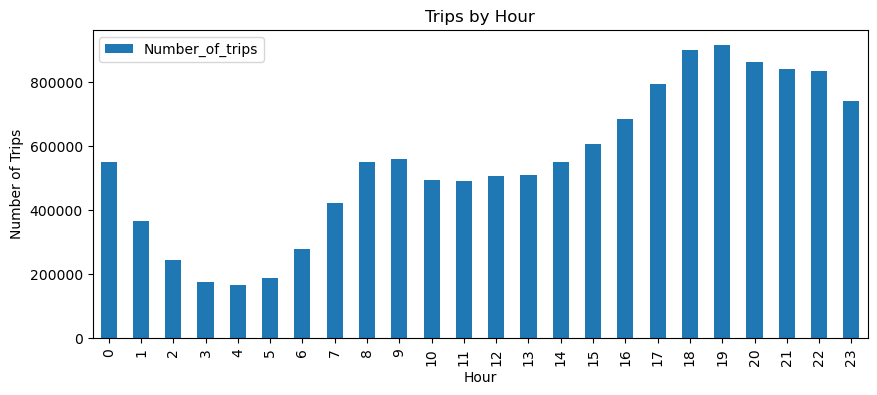

In [82]:
# plotting the results

df_hour.plot(kind='bar', figsize=(10,4))
plt.ylabel('Number of Trips')
plt.title('Trips by Hour')
plt.show()

## Count the number of trips by month

In [20]:
df_month_grouped = df.groupby(['Month']).count()
df_month = pd.DataFrame({'Number_of_trips': df_month_grouped.values[:, 0]}, index=df_month_grouped.index)
df_month = df_month.sort_index()  # Sort by month order
print(df_month)


          Number_of_trips
Month                    
April             2280837
February          2263620
January           1953801
June              2816895
March             2259773
May               2695553


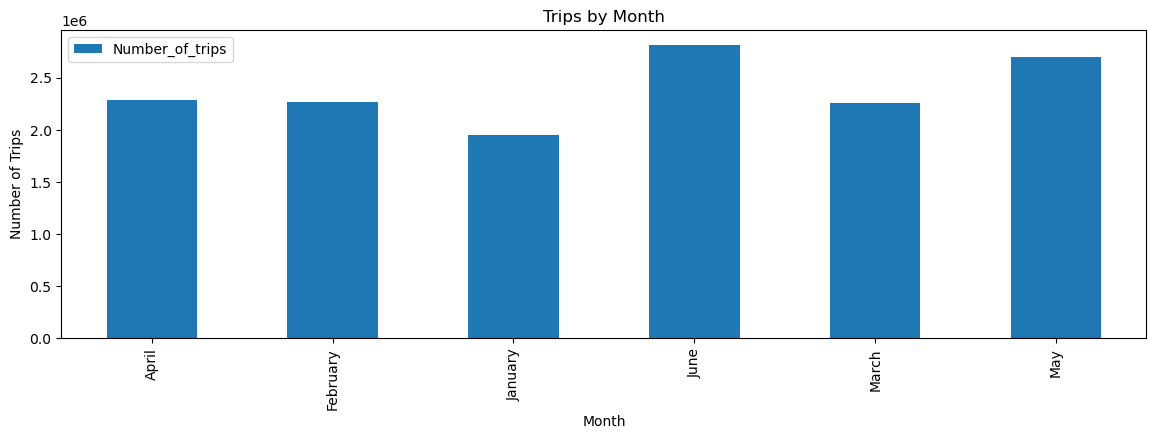

In [91]:
df_month.plot(kind='bar', figsize=(14,4))

plt.ylabel('Number of Trips')
plt.title('Trips by Month')

plt.show()


 ## Find the average number of trips per hour

In [40]:
df_hour_avg = df_hour.groupby(['Hour']).mean()
df_hour_avg.reset_index(inplace=True)  # Reset index for better formatting

# Display the DataFrame
import IPython.display as display

display.display(df_hour_avg)

,Hour,Number_of_trips
0,0,602178.0
1,1,394510.0
2,2,260603.0
3,3,183655.0
4,4,173038.0
5,5,193523.0
6,6,288533.0
7,7,443543.0
8,8,583348.0
9,9,593437.0


In [39]:
pip install prettytable

Note: you may need to restart the kernel to use updated packages.


## Count trips by location

In [44]:
df_location_grouped = df.groupby(['locationID']).count()
df_location = pd.DataFrame({'Number_of_trips': df_location_grouped.values[:, 0]}, index=df_location_grouped.index)
print(df_location)

            Number_of_trips
locationID                 
1                       105
2                         8
3                      3684
4                     89319
5                        26
...                     ...
261                   67904
262                  108338
263                  133630
264                       7
265                    6257

[262 rows x 1 columns]


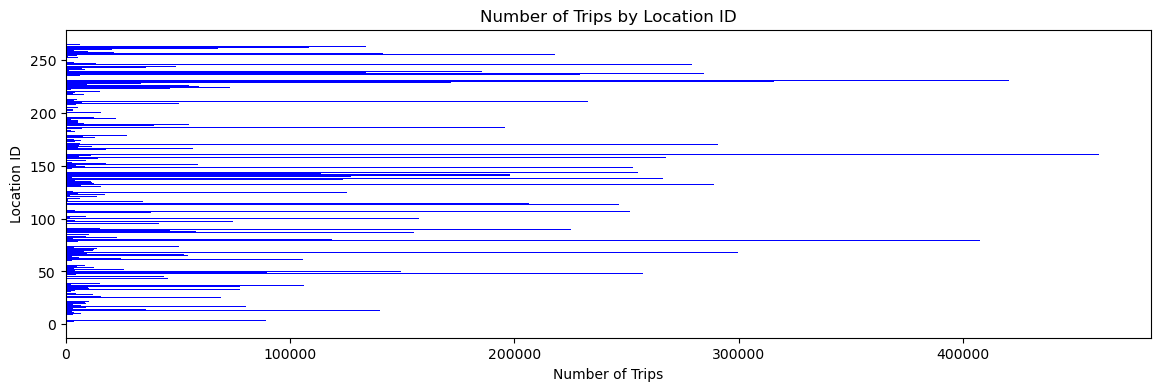

In [62]:
plt.figure(figsize=(14, 4))
plt.barh(df_location.index, df_location['Number_of_trips'], color='blue')
plt.title('Number of Trips by Location ID')
plt.xlabel('Number of Trips')
plt.ylabel('Location ID')
plt.show()

## Find the peak hour for trips

In [65]:
peak_hour = df_hour['Number_of_trips'].idxmax()
peak_trip_count = df_hour['Number_of_trips'].max()
print(f"The peak hour is {peak_hour} with {peak_trip_count} trips.")


The peak hour is 19 with 1007464 trips.


##  Count trips for each dispatching base

In [68]:
df_dispatch_base_grouped = df.groupby(['Dispatching_base_num']).count()
df_dispatch_base = pd.DataFrame({'Number_of_trips': df_dispatch_base_grouped.values[:, 0]}, index=df_dispatch_base_grouped.index)
print(df_dispatch_base)

                      Number_of_trips
Dispatching_base_num                 
B02512                         255772
B02598                        1526660
B02617                        2068525
B02682                        3484530
B02764                        5753653
B02765                        1152727
B02835                          26622
B02836                           1990


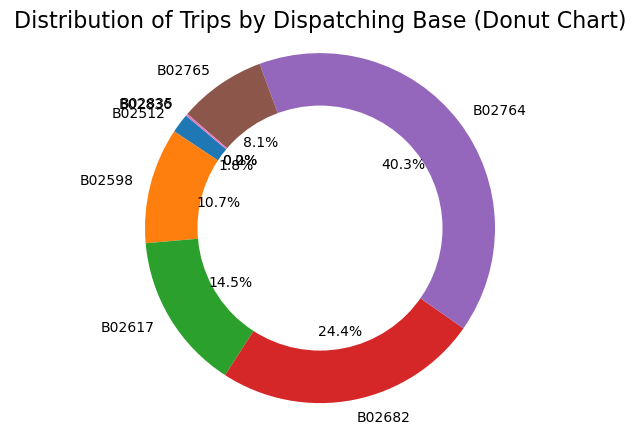

In [80]:
plt.figure(figsize=(8, 5))
# Create a pie chart
wedges, texts, autotexts = plt.pie(df_dispatch_base['Number_of_trips'], labels=df_dispatch_base.index, autopct='%1.1f%%', startangle=140)

# Draw a circle at the center of the pie chart to create a donut
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Distribution of Trips by Dispatching Base (Donut Chart)', fontsize=16)
plt.axis('equal')  # Equal aspect ratio ensures the donut chart is circular
plt.show()

## Total number of trips

In [82]:
total_trips = df['Date_time'].count()
print(f"Total number of trips: {total_trips}")


Total number of trips: 14270479


## Trips by weekday

In [93]:
df_weekday_grouped = df.groupby(['Weekday'], sort = False).count()

#Creating the grouped DataFrame
df_weekday = pd.DataFrame({'Number_of_trips':df_weekday_grouped.values[:,0]}, index = df_weekday_grouped.index) 

df_weekday

,Number_of_trips
Weekday,
Sunday,1952782
Saturday,2414563
Tuesday,1872902
Monday,1694252
Thursday,2159598
Friday,2282571
Wednesday,1893811


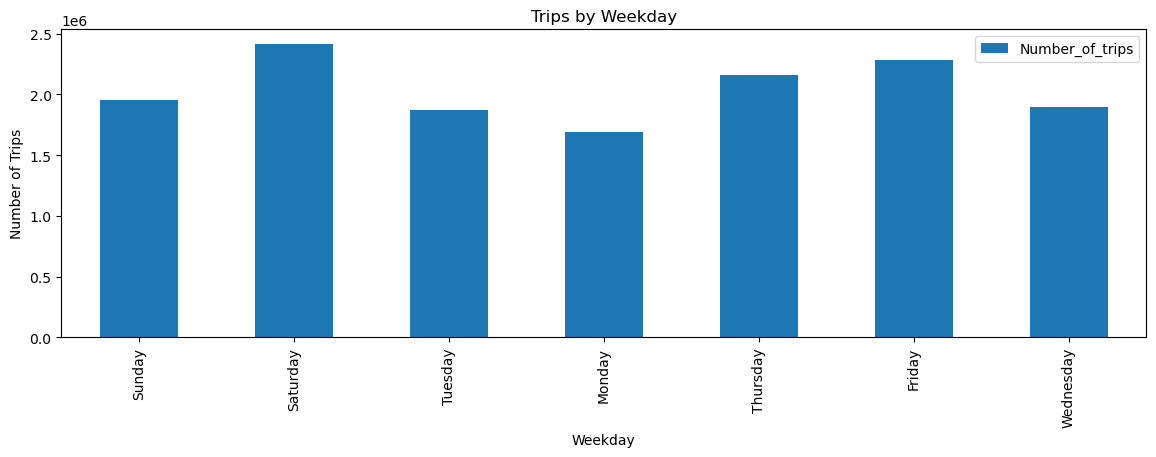

In [100]:
df_weekday.plot(kind='bar', figsize=(14,4))

plt.ylabel('Number of Trips')
plt.title('Trips by Weekday')

plt.show()

##  Trips by hour and month

In [102]:
#Grouping by Hour and Month
df_hour_month_grouped = df.groupby(['Hour','Month']).count()

#Creating the grouped DataFrame
df_hour_month = pd.DataFrame({'Number_of_trips':df_hour_month_grouped.values[:,1]}, index = df_hour_month_grouped.index) 

df_hour_month.head(10)

Number_of_trips
Hour Month                    
0    April               95669
     February            89746
     January             76524
     June               124566
     March               93857
     May                121816
1    April               62604
     February            57312
     January             51001
     June                79638

In [105]:
#Reseting the Index
df_hour_month.reset_index(inplace= True)
df_hour_month.head()

,Hour,Month,Number_of_trips
0,0,April,95669
1,0,February,89746
2,0,January,76524
3,0,June,124566
4,0,March,93857


In [107]:
#Preparing the Number of trips data
#We create a Numpy array that includes the Number of trips data then reshape it to fit our frame
data_hour_month = df_hour_month['Number_of_trips'].values.reshape(24,6)
data_hour_month

array([[ 95669,  89746,  76524, 124566,  93857, 121816],
       [ 62604,  57312,  51001,  79638,  63123,  80832],
       [ 40587,  38047,  37765,  52886,  38405,  52913],
       [ 27545,  26234,  27132,  38126,  29146,  35472],
       [ 27156,  23982,  22973,  37145,  27618,  34164],
       [ 32332,  28037,  24521,  40527,  30179,  37927],
       [ 49405,  44625,  37329,  57925,  46122,  53127],
       [ 73330,  73557,  60033,  87280,  71369,  77974],
       [ 95734,  94800,  78961, 116766,  94107, 102980],
       [ 97576,  95464,  78706, 118846,  96006, 106839],
       [ 84648,  82006,  68311, 105387,  82432,  97308],
       [ 81714,  79762,  69896, 106454,  80477,  98413],
       [ 84749,  80409,  73737, 108824,  83994, 101308],
       [ 84178,  82242,  75186, 108626,  83881, 103796],
       [ 91198,  89784,  82081, 117908,  90250, 113242],
       [102188, 101273,  90431, 129420, 100261, 125841],
       [115442, 118379, 104169, 143206, 115092, 140882],
       [134753, 142079, 127752,

In [109]:
df_hour_month = pd.DataFrame(data = data_hour_month, index = df_hour_month['Hour'].unique(), columns = df['Month'].unique())
df_hour_month.head()

,May,January,March,February,June,April
0,95669,89746,76524,124566,93857,121816
1,62604,57312,51001,79638,63123,80832
2,40587,38047,37765,52886,38405,52913
3,27545,26234,27132,38126,29146,35472
4,27156,23982,22973,37145,27618,34164


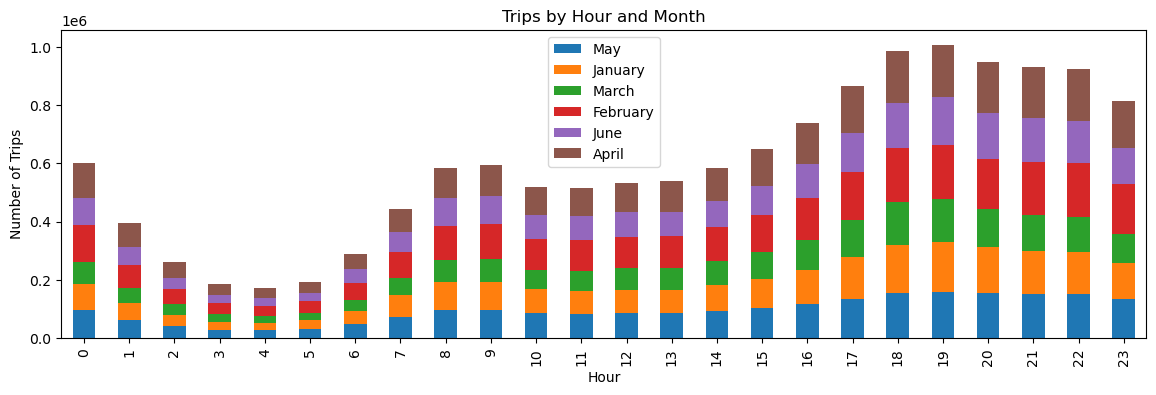

In [115]:
df_hour_month.plot(kind='bar', figsize=(14,4), stacked=True)

plt.xlabel('Hour')
plt.ylabel('Number of Trips')
plt.title('Trips by Hour and Month')

plt.show()

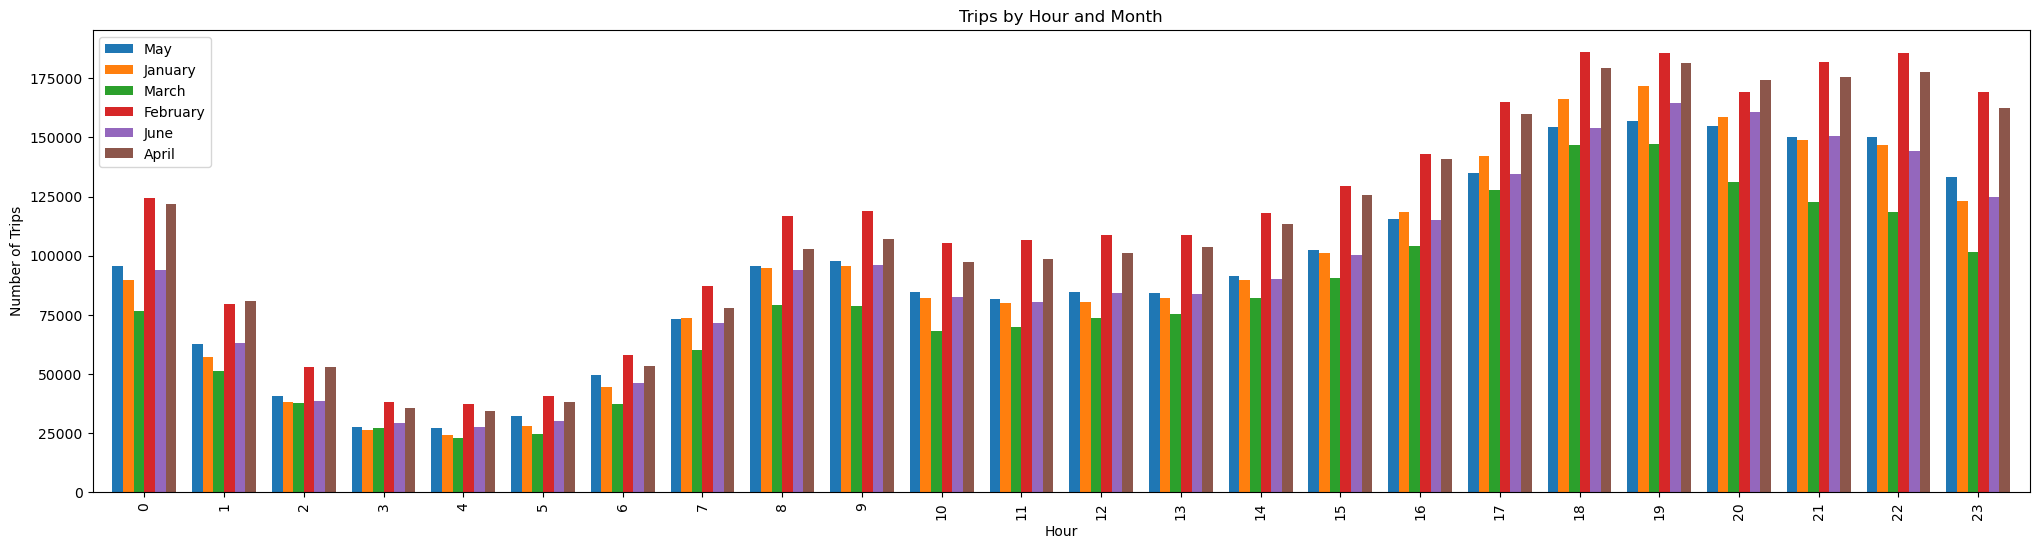

In [117]:
df_hour_month.plot(kind='bar', figsize=(25,6),width=0.8)

plt.xlabel('Hour')
plt.ylabel('Number of Trips')
plt.title('Trips by Hour and Month')

plt.show()


## Trips by weekday and month

In [120]:
df_month_weekday_grouped = df.groupby(['Month','Weekday'], sort=False).count()

#Creating the grouped DataFrame
df_month_weekday = pd.DataFrame({'Number_of_trips':df_month_weekday_grouped.values[:,1]}, index = df_month_weekday_grouped.index) 

df_month_weekday.head(10)

Number_of_trips
Month    Weekday                  
May      Sunday             420043
January  Sunday             234599
March    Saturday           345696
         Tuesday            353412
January  Monday             194004
February Thursday           342198
June     Tuesday            445025
April    Tuesday            269047
         Saturday           352202
June     Friday             406185

In [122]:
#Reseting the Index
df_month_weekday.reset_index(inplace= True)

#Preparing the Number of trips 
data_month_weekday = df_month_weekday['Number_of_trips'].values.reshape(6,7)

df_month_weekday = pd.DataFrame(data = data_month_weekday, index = df_month_weekday['Month'].unique(), columns = df['Weekday'].unique())
df_month_weekday.head()

,Sunday,Saturday,Tuesday,Monday,Thursday,Friday,Wednesday
May,420043,234599,345696,353412,194004,342198,445025
January,269047,352202,406185,406837,365844,292863,466789
March,302083,380444,336532,392900,340965,341069,359703
February,281583,271919,342656,406103,253079,200125,371205
June,375296,292470,345532,279665,250109,312823,396951


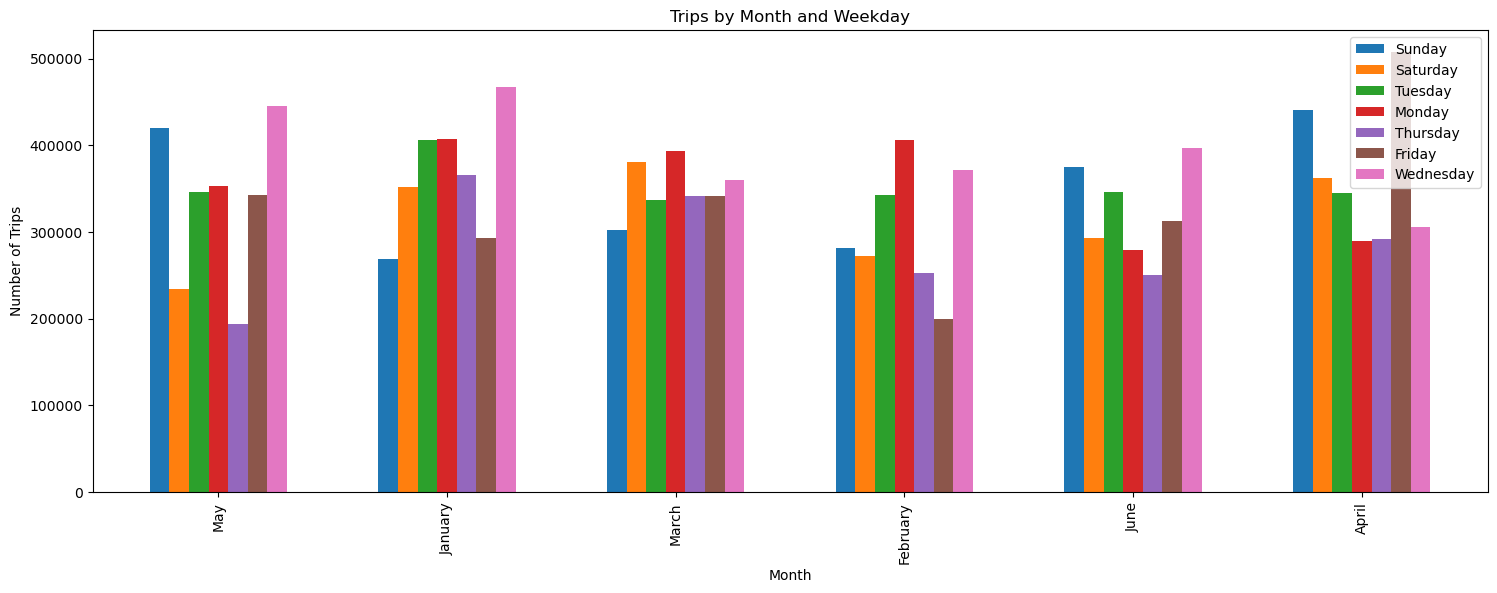

In [130]:
df_month_weekday.plot(kind='bar', figsize=(18,6), width = 0.6)

plt.xlabel('Month')
plt.ylabel('Number of Trips')
plt.title('Trips by Month and Weekday')

plt.show()

## What times are the busiest for Uber pickup?

In [142]:
# Extract hour and weekday from the Date_time column
df['hour'] = df['Date_time'].dt.hour
df['weekday'] = df['Date_time'].dt.day_name()  # Get the name of the weekday
# Grouping by hour and weekday to count the number of rides
summary = df.groupby(['hour', 'weekday']).size().reset_index(name='size')
# Reordering the weekdays to ensure they appear in the correct order
summary['weekday'] = pd.Categorical(summary['weekday'], categories=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], ordered=True)

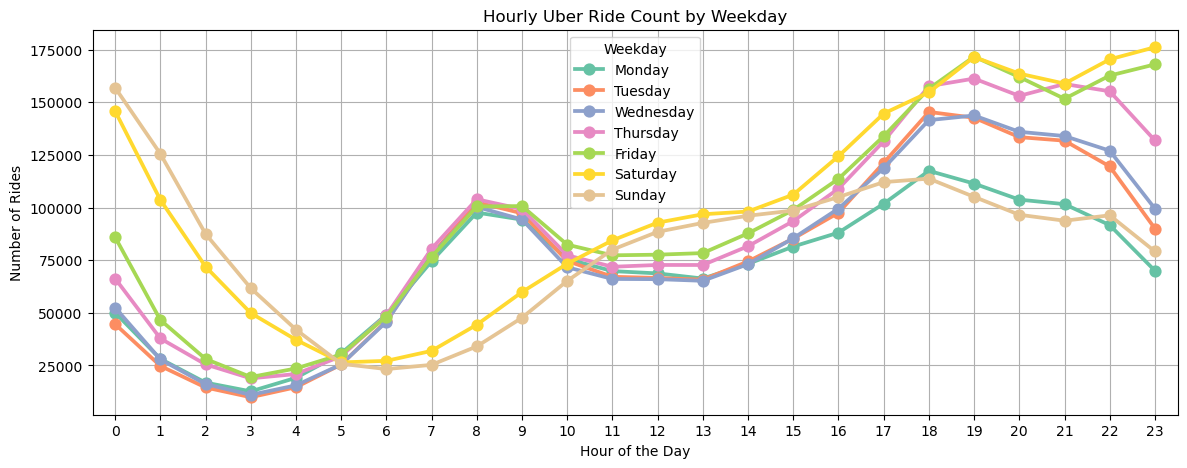

In [148]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 5))

# Create the point plot
sns.pointplot(x="hour", y="size", hue="weekday", data=summary, palette="Set2")

# Add labels and title
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Rides")
plt.title("Hourly Uber Ride Count by Weekday")

# Customize the legend
plt.legend(title="Weekday")

# Show the plot
plt.grid(True)  # Add grid lines
plt.show()
